In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


results = pd.read_csv('C:/Users/renan/Downloads/results.csv')
shootouts = pd.read_csv('C:/Users/renan/Downloads/shootouts.csv')
goalscorers = pd.read_csv('C:/Users/renan/Downloads/goalscorers.csv')

display(results.head())
display(shootouts.head())
display(goalscorers.head())


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [10]:
# Questão 1 Em qual competição internacional o Brasil é mais vitorioso (por índice de 
# vitórias / jogos competidos)? 

# filtrando jogos do Brasil em que jogou em casa ou fora
brazil_games = results[(results['home_team'] == 'Brazil') | (results['away_team'] == 'Brazil')]

# criando uma coluna booleana para identificar se o Brasil ganhou 
brazil_games['brazil_win'] = ((brazil_games['home_team'] == 'Brazil') & (brazil_games['home_score'] > brazil_games['away_score'])) | \
                             ((brazil_games['away_team'] == 'Brazil') & (brazil_games['away_score'] > brazil_games['home_score']))


C:\Users\renan\AppData\Local\Temp\ipykernel_39092\2683165241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_games['brazil_win'] = ((brazil_games['home_team'] == 'Brazil') & (brazil_games['home_score'] > brazil_games['away_score'])) | \


In [11]:
brazil_games

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,brazil_win
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,False
433,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,True
465,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,False
466,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,False
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False
...,...,...,...,...,...,...,...,...,...,...
47392,2024-07-06,Uruguay,Brazil,0,0,Copa América,Las Vegas,United States,True,False
47486,2024-09-06,Brazil,Ecuador,1,0,FIFA World Cup qualification,Curitiba,Brazil,False,True
47588,2024-09-10,Paraguay,Brazil,1,0,FIFA World Cup qualification,Asunción,Paraguay,False,False
47627,2024-10-10,Chile,Brazil,1,2,FIFA World Cup qualification,Santiago,Chile,False,True


In [18]:
# calculando total de jogos e total de vitorias agrupado por torneio
brazil_win_ratio = brazil_games.groupby('tournament').agg(total_games=('brazil_win', 'size'),
                                                          wins=('brazil_win', 'sum'),
                                                          first_game=('date', 'min'))
# criando uma coluna com indice de vitorias
brazil_win_ratio['win_rate'] = brazil_win_ratio['wins'] / brazil_win_ratio['total_games']


In [19]:
brazil_win_ratio

,total_games,wins,first_game,win_rate
tournament,,,,
Atlantic Cup,5,3,1956-06-24,0.600000
Brazil Independence Cup,4,3,1972-06-28,0.750000
Confederations Cup,33,23,1997-12-12,0.696970
Copa América,195,109,1916-07-08,0.558974
Copa Bernardo O'Higgins,10,6,1955-09-18,0.600000
Copa Oswaldo Cruz,16,11,1950-05-07,0.687500
Copa Rio Branco,18,8,1931-09-06,0.444444
Copa Roca,23,11,1914-09-27,0.478261
FIFA World Cup,114,76,1930-07-14,0.666667


In [20]:
# Identificando quais campeonatos o Brasil obteve maior indice de vitorias.
# Coloquei os cinco maiores indices pois os dois primeiros o Brasil disputou apenas um jogo
best_competition = brazil_win_ratio.sort_values(by='win_rate', ascending=False).head(5)
display(best_competition)

,total_games,wins,first_game,win_rate
tournament,,,,
Lunar New Year Cup,1,1,2005-02-09,1.00000
King's Cup,1,1,2000-02-23,1.00000
Brazil Independence Cup,4,3,1972-06-28,0.75000
Confederations Cup,33,23,1997-12-12,0.69697
Pan American Championship,16,11,1952-04-06,0.68750


In [21]:
# Questão 2: Qual o time mais vitorioso em cada competição internacional?

In [25]:
results['home_win'] = results['home_score'] > results['away_score']
results['away_win'] = results['away_score'] > results['home_score']


In [26]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,False,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,False,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
47772,2024-10-15,Palestine,Kuwait,2,2,FIFA World Cup qualification,Al Rayyan,Qatar,True,False,False
47773,2024-10-15,South Korea,Iraq,3,2,FIFA World Cup qualification,Yongin,South Korea,False,True,False
47774,2024-10-15,Japan,Australia,1,1,FIFA World Cup qualification,Saitama,Japan,False,False,False
47775,2024-10-15,China PR,Indonesia,2,1,FIFA World Cup qualification,Qingdao,China PR,False,True,False


In [29]:
#contagem de vitórias como time da casa
home_wins = results[results['home_win']].groupby(['tournament', 'home_team']).size().reset_index(name='wins')

#contagem de vitórias como time visitante
away_wins = results[results['away_win']].groupby(['tournament', 'away_team']).size().reset_index(name='wins')
display(home_wins)
display(away_wins)

,tournament,home_team,wins
0,ABCS Tournament,Aruba,2
1,ABCS Tournament,Curaçao,3
2,ABCS Tournament,Suriname,5
3,AFC Asian Cup,Australia,10
4,AFC Asian Cup,Bahrain,4
...,...,...,...
1863,West African Cup,Togo,3
1864,Windward Islands Tournament,Dominica,10
1865,Windward Islands Tournament,Grenada,14
1866,Windward Islands Tournament,Saint Lucia,13


,tournament,away_team,wins
0,ABCS Tournament,Bonaire,2
1,ABCS Tournament,Curaçao,1
2,ABCS Tournament,Suriname,2
3,AFC Asian Cup,Australia,5
4,AFC Asian Cup,Bahrain,3
...,...,...,...
1695,Windward Islands Tournament,Grenada,11
1696,Windward Islands Tournament,Saint Lucia,6
1697,Windward Islands Tournament,Saint Vincent and the Grenadines,13
1698,World Unity Cup,Chagos Islands,1


In [30]:
# renomeando as colunas
home_wins = home_wins.rename(columns={'home_team': 'team'})
away_wins = away_wins.rename(columns={'away_team': 'team'})

# concatenando as tabelas
all_wins = pd.concat([home_wins, away_wins])


In [31]:
total_wins_per_team = all_wins.groupby(['tournament', 'team']).agg(total_wins=('wins', 'sum')).reset_index()


In [32]:
most_victorious_teams = total_wins_per_team.loc[total_wins_per_team.groupby('tournament')['total_wins'].idxmax()]
display(most_victorious_teams)


,tournament,team,total_wins
3,ABCS Tournament,Suriname,7
10,AFC Asian Cup,Iran,45
45,AFC Asian Cup qualification,Iran,36
94,AFC Challenge Cup,North Korea,11
115,AFC Challenge Cup qualification,Philippines,7
...,...,...,...
2120,Viva World Cup,Padania,13
2129,WAFF Championship,Iran,19
2143,West African Cup,Ghana,16
2150,Windward Islands Tournament,Grenada,25


In [33]:
# Questão 3: Qual a década mais vitoriosa do Brasil, incluindo amistosos?  
# (Dica: esse seria legal ver um gráfico de barras do índice de vitórias)

In [50]:
brazil_games = results[(results['home_team'] == 'Brazil') | (results['away_team'] == 'Brazil')]
brazil_games


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,True,False
433,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,False,True
465,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,False,False
466,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,False,False
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
47392,2024-07-06,Uruguay,Brazil,0,0,Copa América,Las Vegas,United States,True,False,False
47486,2024-09-06,Brazil,Ecuador,1,0,FIFA World Cup qualification,Curitiba,Brazil,False,True,False
47588,2024-09-10,Paraguay,Brazil,1,0,FIFA World Cup qualification,Asunción,Paraguay,False,True,False
47627,2024-10-10,Chile,Brazil,1,2,FIFA World Cup qualification,Santiago,Chile,False,False,True


In [51]:
# Transformei coluna data no tipo date, 
brazil_games['date'] = pd.to_datetime(brazil_games['date'])
# Extrai o ano com resto 10 e multipliquei por 10 para pegar a década
brazil_games['decade'] = (brazil_games['date'].dt.year // 10)*10
brazil_games

C:\Users\renan\AppData\Local\Temp\ipykernel_39092\2312839832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_games['date'] = pd.to_datetime(brazil_games['date'])
C:\Users\renan\AppData\Local\Temp\ipykernel_39092\2312839832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_games['decade'] = (brazil_games['date'].dt.year // 10)*10


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,decade
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,True,False,1910
433,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,False,True,1910
465,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,False,False,1910
466,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,False,False,1910
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False,True,1910
...,...,...,...,...,...,...,...,...,...,...,...,...
47392,2024-07-06,Uruguay,Brazil,0,0,Copa América,Las Vegas,United States,True,False,False,2020
47486,2024-09-06,Brazil,Ecuador,1,0,FIFA World Cup qualification,Curitiba,Brazil,False,True,False,2020
47588,2024-09-10,Paraguay,Brazil,1,0,FIFA World Cup qualification,Asunción,Paraguay,False,True,False,2020
47627,2024-10-10,Chile,Brazil,1,2,FIFA World Cup qualification,Santiago,Chile,False,False,True,2020


In [39]:
brazil_games['brazil_win'] = ((brazil_games['home_team'] == 'Brazil') & (brazil_games['home_score'] > brazil_games['away_score'])) | \
                             ((brazil_games['away_team'] == 'Brazil') & (brazil_games['away_score'] > brazil_games['home_score']))


In [46]:
decade_win_ratio = brazil_games.groupby('decade').agg(total_games=('brazil_win', 'size'),
                                                      wins=('brazil_win', 'sum'))
decade_win_ratio['win_rate'] = decade_win_ratio['wins'] / decade_win_ratio['total_games']
decade_win_ratio = decade_win_ratio.sort_values(by='win_rate', ascending=False)
decade_win_ratio

,total_games,wins,win_rate
decade,,,
2010,142,96,0.676056
1960,114,77,0.675439
1970,101,67,0.663366
1990,160,105,0.656250
2020,54,35,0.648148
1950,95,61,0.642105
1980,115,72,0.626087
2000,159,98,0.616352
1930,24,14,0.583333


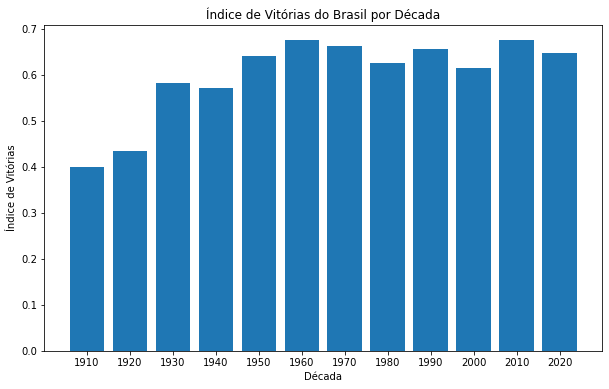

In [83]:
import matplotlib.pyplot as plt

# Usando a biblioteca pyplot fioz um gráfico de barras para demonstrar a década em que o Brasil teve melhor desempenho
# percentual, ou seja, mais vitórias em relação ao número de partidas disputadas que é a década de 2010 ligeiramente
# melhor que a década de 60

plt.figure(figsize=(10, 6))
plt.bar(decade_win_ratio.index, decade_win_ratio['win_rate'], width=8)
plt.xlabel('Década')
plt.ylabel('Índice de Vitórias')
plt.title('Índice de Vitórias do Brasil por Década')
plt.xticks(decade_win_ratio.index)  # Define os rótulos no eixo X com as décadas
plt.show()


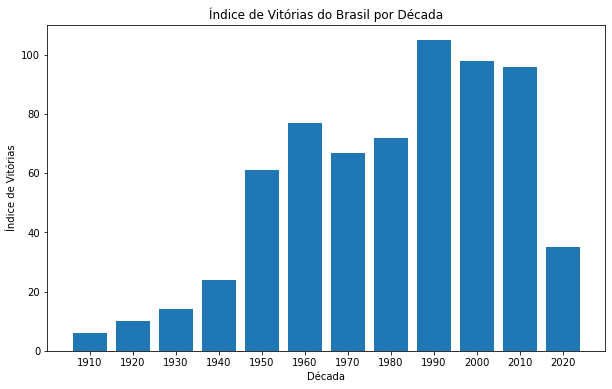

In [43]:
# Aqui eu trouxe um gráfico do número de vitorias totais por década e observamos que a década de 90 foi que o Brasil
# obteve mais vitórias.

plt.figure(figsize=(10, 6))
plt.bar(decade_win_ratio.index, decade_win_ratio['wins'], width=8)
plt.xlabel('Década')
plt.ylabel('Índice de Vitórias')
plt.title('Índice de Vitórias do Brasil por Década')
plt.xticks(decade_win_ratio.index)  # Define os rótulos no eixo X com as décadas
plt.show()


In [ ]:
# Questão 4 : Qual time mais venceu o Brasil (incluindo amistosos)?

In [53]:
brazil_games4 = results[(results['home_team'] == 'Brazil') | (results['away_team'] == 'Brazil')].copy()


In [54]:
brazil_games4['brazil_loss'] = ((brazil_games4['home_team'] == 'Brazil') & (brazil_games4['home_score'] < brazil_games4['away_score'])) | \
                              ((brazil_games4['away_team'] == 'Brazil') & (brazil_games4['away_score'] < brazil_games4['home_score']))


In [57]:
brazil_games4

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,brazil_loss
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,True,False,True
433,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,False,True,False
465,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,False,False,False
466,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,False,False,False
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
47392,2024-07-06,Uruguay,Brazil,0,0,Copa América,Las Vegas,United States,True,False,False,False
47486,2024-09-06,Brazil,Ecuador,1,0,FIFA World Cup qualification,Curitiba,Brazil,False,True,False,False
47588,2024-09-10,Paraguay,Brazil,1,0,FIFA World Cup qualification,Asunción,Paraguay,False,True,False,True
47627,2024-10-10,Chile,Brazil,1,2,FIFA World Cup qualification,Santiago,Chile,False,False,True,False


In [55]:
brazil_losses = brazil_games4[brazil_games4['brazil_loss']]


In [56]:
brazil_losses

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,brazil_loss
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,True,False,True
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False,True,True
499,1917-10-03,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,True,False,True
503,1917-10-07,Uruguay,Brazil,4,0,Copa América,Montevideo,Uruguay,False,True,False,True
507,1917-10-16,Uruguay,Brazil,3,1,Friendly,Montevideo,Uruguay,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
46095,2023-06-20,Brazil,Senegal,2,4,Friendly,Lisbon,Portugal,True,False,True,True
46539,2023-10-17,Uruguay,Brazil,2,0,FIFA World Cup qualification,Montevideo,Uruguay,False,True,False,True
46597,2023-11-16,Colombia,Brazil,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,True,False,True
46730,2023-11-21,Brazil,Argentina,0,1,FIFA World Cup qualification,Rio de Janeiro,Brazil,False,False,True,True


In [58]:
brazil_losses['opponent'] = brazil_losses.apply(lambda x: x['away_team'] if x['home_team'] == 'Brazil' else x['home_team'], axis=1)


C:\Users\renan\AppData\Local\Temp\ipykernel_39092\441168585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_losses['opponent'] = brazil_losses.apply(lambda x: x['away_team'] if x['home_team'] == 'Brazil' else x['home_team'], axis=1)


In [59]:
losses_by_opponent = brazil_losses.groupby('opponent').size().reset_index(name='losses')


In [62]:
losses_by_opponent.sort_values(by='losses', ascending=False)

,opponent,losses
0,Argentina,40
34,Uruguay,21
22,Paraguay,12
18,Mexico,10
6,Chile,8
23,Peru,5
3,Bolivia,5
13,France,5
14,Germany,5
17,Italy,5


In [60]:
# O maior carrasco do Brasil é a Argentina com 40 vitórias em cima do Brasil e em segundo vem o Uruguay com 21. 
# Não é a toa que essa rivalidade é tão famosa
most_victorious_opponent = losses_by_opponent.sort_values(by='losses', ascending=False).head(1)
display(most_victorious_opponent)


,opponent,losses
0,Argentina,40


In [63]:
# Questão 5: Qual jogador brasileiro fez mais gols de penalti?

In [65]:
brazilian_goals = goalscorers[goalscorers['team'] == 'Brazil']
brazilian_goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
11,1916-07-08,Brazil,Chile,Brazil,Demóstenes Correia de Syllos,29.0,False,False
14,1916-07-10,Argentina,Brazil,Brazil,Manoel Alencar Monte,23.0,False,False
15,1916-07-12,Brazil,Uruguay,Brazil,Arthur Friedenreich,8.0,False,False
22,1917-10-03,Argentina,Brazil,Brazil,Neco,8.0,False,False
24,1917-10-03,Argentina,Brazil,Brazil,Silvio Lagreca,39.0,False,True
...,...,...,...,...,...,...,...,...
44283,2024-06-28,Paraguay,Brazil,Brazil,Vinícius Júnior,35.0,False,False
44284,2024-06-28,Paraguay,Brazil,Brazil,Sávio,43.0,False,False
44285,2024-06-28,Paraguay,Brazil,Brazil,Vinícius Júnior,45.0,False,False
44287,2024-06-28,Paraguay,Brazil,Brazil,Lucas Paquetá,65.0,False,True


In [67]:

penalty_goals = brazilian_goals[brazilian_goals['penalty'] == True]
penalty_goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
24,1917-10-03,Argentina,Brazil,Brazil,Silvio Lagreca,39.0,False,True
112,1922-10-15,Brazil,Argentina,Brazil,Amílcar Barbuy,86.0,False,True
1623,1949-04-13,Brazil,Chile,Brazil,Cláudio Christovam de Pinho,49.0,False,True
1640,1949-04-17,Brazil,Colombia,Brazil,Millón Medeiros,24.0,False,True
1687,1949-04-30,Brazil,Uruguay,Brazil,Jair,40.0,False,True
...,...,...,...,...,...,...,...,...
41510,2021-10-07,Venezuela,Brazil,Brazil,Gabriel Barbosa,85.0,False,True
42327,2022-03-24,Brazil,Chile,Brazil,Neymar,44.0,False,True
42329,2022-03-24,Brazil,Chile,Brazil,Philippe Coutinho,72.0,False,True
43022,2022-12-05,Brazil,South Korea,Brazil,Neymar,13.0,False,True


In [70]:
# O jogador com mais gols de penalti para o Brasil é o Neymar com 8 gols marcados, em segundo vem Zico com 5
penalty_goals_by_player = penalty_goals.groupby('scorer').size().reset_index(name='penalty_goals')
penalty_goals_by_player.sort_values(by='penalty_goals',ascending=False)

,scorer,penalty_goals
17,Neymar,8
31,Zico,5
25,Ronaldinho,5
26,Ronaldo,5
24,Romário,4
29,Sócrates,3
21,Rivaldo,3
18,Philippe Coutinho,2
11,Kaká,2
23,Robinho,2


In [ ]:
# Questão 6: Quais os 5 times que mais tomaram gols do Brasil?  
# (Dica: esse seria legal um gráfico de barras vertical)

In [71]:
brazil_games


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,True,False
433,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,False,True
465,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,False,False
466,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,False,False
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
47392,2024-07-06,Uruguay,Brazil,0,0,Copa América,Las Vegas,United States,True,False,False
47486,2024-09-06,Brazil,Ecuador,1,0,FIFA World Cup qualification,Curitiba,Brazil,False,True,False
47588,2024-09-10,Paraguay,Brazil,1,0,FIFA World Cup qualification,Asunción,Paraguay,False,True,False
47627,2024-10-10,Chile,Brazil,1,2,FIFA World Cup qualification,Santiago,Chile,False,False,True


In [82]:
brazil_games['brazil_goals'] = brazil_games.apply(lambda x: x['home_score'] if x['home_team'] == 'Brazil' else x['away_score'], axis=1)
brazil_games

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,brazil_goals,opponent
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,True,False,0,Argentina
433,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,False,True,1,Argentina
465,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,False,False,1,Chile
466,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,False,False,1,Argentina
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False,True,1,Uruguay
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392,2024-07-06,Uruguay,Brazil,0,0,Copa América,Las Vegas,United States,True,False,False,0,Uruguay
47486,2024-09-06,Brazil,Ecuador,1,0,FIFA World Cup qualification,Curitiba,Brazil,False,True,False,1,Ecuador
47588,2024-09-10,Paraguay,Brazil,1,0,FIFA World Cup qualification,Asunción,Paraguay,False,True,False,0,Paraguay
47627,2024-10-10,Chile,Brazil,1,2,FIFA World Cup qualification,Santiago,Chile,False,False,True,2,Chile


In [81]:
# Filtrando os adversários que levaram gol do Brasil
brazil_games['opponent'] = brazil_games.apply(lambda x: x['away_team'] if x['home_team'] == 'Brazil' else x['home_team'], axis=1)
brazil_games

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,brazil_goals,opponent
432,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,True,False,0,Argentina
433,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,False,True,1,Argentina
465,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,False,False,1,Chile
466,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,False,False,1,Argentina
468,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,False,True,1,Uruguay
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392,2024-07-06,Uruguay,Brazil,0,0,Copa América,Las Vegas,United States,True,False,False,0,Uruguay
47486,2024-09-06,Brazil,Ecuador,1,0,FIFA World Cup qualification,Curitiba,Brazil,False,True,False,1,Ecuador
47588,2024-09-10,Paraguay,Brazil,1,0,FIFA World Cup qualification,Asunción,Paraguay,False,True,False,0,Paraguay
47627,2024-10-10,Chile,Brazil,1,2,FIFA World Cup qualification,Santiago,Chile,False,False,True,2,Chile


In [80]:
# Selecionando as seleções que tomaram gol do Brasil e somando a quantidade
goals_against_opponents = brazil_games.groupby('opponent').agg(total_goals_taken=('brazil_goals', 'sum')).reset_index()
goals_against_opponents

,opponent,total_goals_taken
0,Algeria,8
1,Andorra,3
2,Argentina,165
3,Australia,21
4,Austria,17
...,...,...
86,Venezuela,97
87,Wales,20
88,Yugoslavia,32
89,Zambia,2


In [79]:
# Ordenando os valores em ordem decrescente
top_5_opponents = goals_against_opponents.sort_values(by='total_goals_taken', ascending=False).head(5)
display(top_5_opponents)


,opponent,total_goals_taken
60,Paraguay,182
12,Chile,171
2,Argentina,165
85,Uruguay,140
61,Peru,114


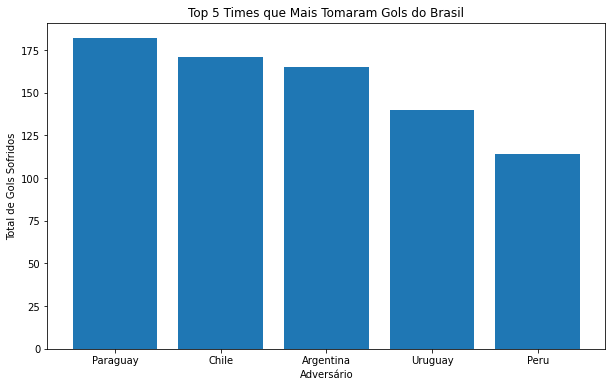

In [78]:
import matplotlib.pyplot as plt

# O gráfico mostra que o Paraguai foi a seleção mais vazada pelo Brasil com 182 gols sofridos e depois vem o Chile com 171

plt.figure(figsize=(10, 6))
plt.bar(top_5_opponents['opponent'], top_5_opponents['total_goals_taken'])
plt.xlabel('Adversário')
plt.ylabel('Total de Gols Sofridos')
plt.title('Top 5 Times que Mais Tomaram Gols do Brasil')
plt.show()
